In [2]:
num_class = 5
dataset='diabetic_retinopathy'
model_path = '/media/ruanjiacheng/新加卷/ecodes/Prompt/CV/KDPEFT/best_adapter_output/diabetic_retinopathy.pth.tar'
tuning_mode='gist_adapter'

In [3]:
import matplotlib.pyplot as plt
from torchvision.transforms import Compose, Resize, ToTensor, Normalize
import torch
from PIL import Image
import os
import numpy as np

from timm.models import create_model
from models import vision_transformer_gist_adapter_attvis
from data import create_loader, create_dataset
import cv2


# 加载预训练的 ViT 模型
model = create_model(
    'vit_base_patch16_224_in21k',
    pretrained=False,
    num_classes=num_class,
    scriptable=True,
    checkpoint_path=model_path,
    tuning_mode=tuning_mode)
model = model.to('cuda')  # 将模型移动到CUDA设备上
model.eval()

weight_gist = model.head.weight.data.cpu().numpy().flatten()

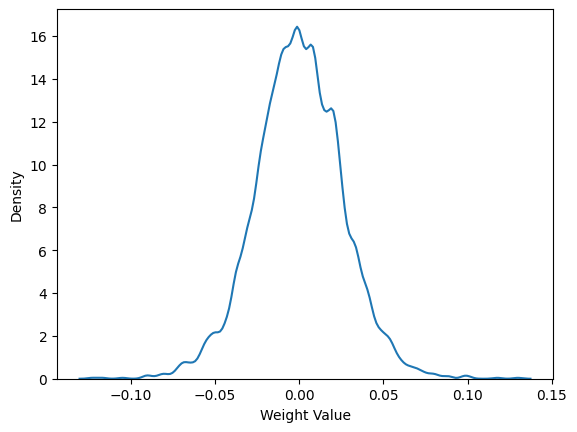

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 使用seaborn的kdeplot函数来创建核密度估计图
sns.kdeplot(weight_gist, bw_adjust=0.5)  # bw_adjust是带宽调整参数，用于平滑或锐化曲线

# 可选：设置图表的标题和标签
# plt.title('Kernel Density Estimation of ' + tuning_mode +'_'+ dataset + ' Classifier Weights')
plt.xlabel('Weight Value')
plt.ylabel('Density')

# 显示图表
plt.savefig('./diabetic_retinopathy_gist.png', dpi=600)
plt.show()



In [5]:
model_path = '/home/ruanjiacheng/下载/output/vit_base_patch16_224_in21k/vtab/diabetic_retinopathy/model_best.pth.tar'
tuning_mode='adapter'

In [6]:
import matplotlib.pyplot as plt
from torchvision.transforms import Compose, Resize, ToTensor, Normalize
import torch
from PIL import Image
import os
import numpy as np

from timm.models import create_model
from models import vision_transformer_adapter_attvis
from data import create_loader, create_dataset
import cv2


# 加载预训练的 ViT 模型
model = create_model(
    'vit_base_patch16_224_in21k',
    pretrained=False,
    num_classes=num_class,
    scriptable=True,
    checkpoint_path=model_path,
    tuning_mode=tuning_mode)
model = model.to('cuda')  # 将模型移动到CUDA设备上
model.eval()

weight_adapter = model.head.weight.data.cpu().numpy().flatten()
bias = model.head.bias.data.cpu().numpy().flatten()

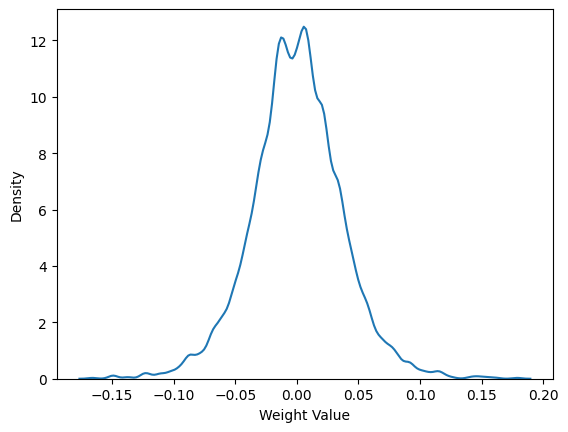

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 使用seaborn的kdeplot函数来创建核密度估计图
sns.kdeplot(weight_adapter, bw_adjust=0.5)  # bw_adjust是带宽调整参数，用于平滑或锐化曲线

# 可选：设置图表的标题和标签
# plt.title('Kernel Density Estimation of ' + tuning_mode +'_'+ dataset + ' Classifier Weights')
plt.xlabel('Weight Value')
plt.ylabel('Density')

# 显示图表
plt.savefig('./diabetic_retinopathy_adapter.png', dpi=600)
plt.show()


In [8]:
model_path = '/home/ruanjiacheng/下载/vit_base_patch16_224_in21k/vtab/diabetic_retinopathy/model_best.pth.tar'
tuning_mode='lp'

In [9]:
import matplotlib.pyplot as plt
from torchvision.transforms import Compose, Resize, ToTensor, Normalize
import torch
from PIL import Image
import os
import numpy as np

from timm.models import create_model
from models import vision_transformer_linearprob_attvis
from data import create_loader, create_dataset
import cv2


# 加载预训练的 ViT 模型
model = create_model(
    'vit_base_patch16_224_in21k',
    pretrained=False,
    num_classes=num_class,
    scriptable=True,
    checkpoint_path=model_path,
    tuning_mode=tuning_mode)
model = model.to('cuda')  # 将模型移动到CUDA设备上
model.eval()

weight_lp = model.head.weight.data.cpu().numpy().flatten()
bias = model.head.bias.data.cpu().numpy().flatten()

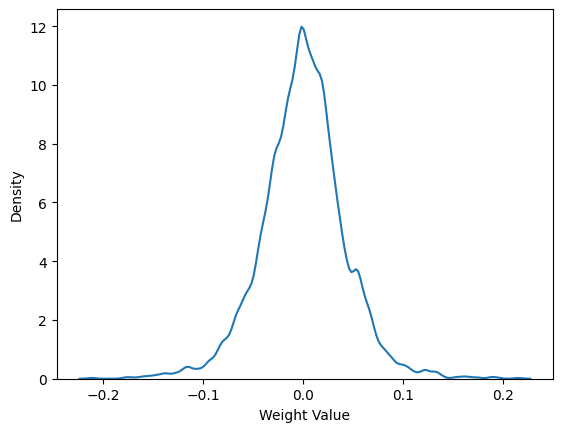

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 使用seaborn的kdeplot函数来创建核密度估计图
sns.kdeplot(weight_lp, bw_adjust=0.5)  # bw_adjust是带宽调整参数，用于平滑或锐化曲线

# 可选：设置图表的标题和标签
# plt.title('Kernel Density Estimation of ' + tuning_mode +'_'+ dataset + ' Classifier Weights')
plt.xlabel('Weight Value')
plt.ylabel('Density')

# 显示图表
plt.savefig('./diabetic_retinopathy_lp.png', dpi=600)
plt.show()


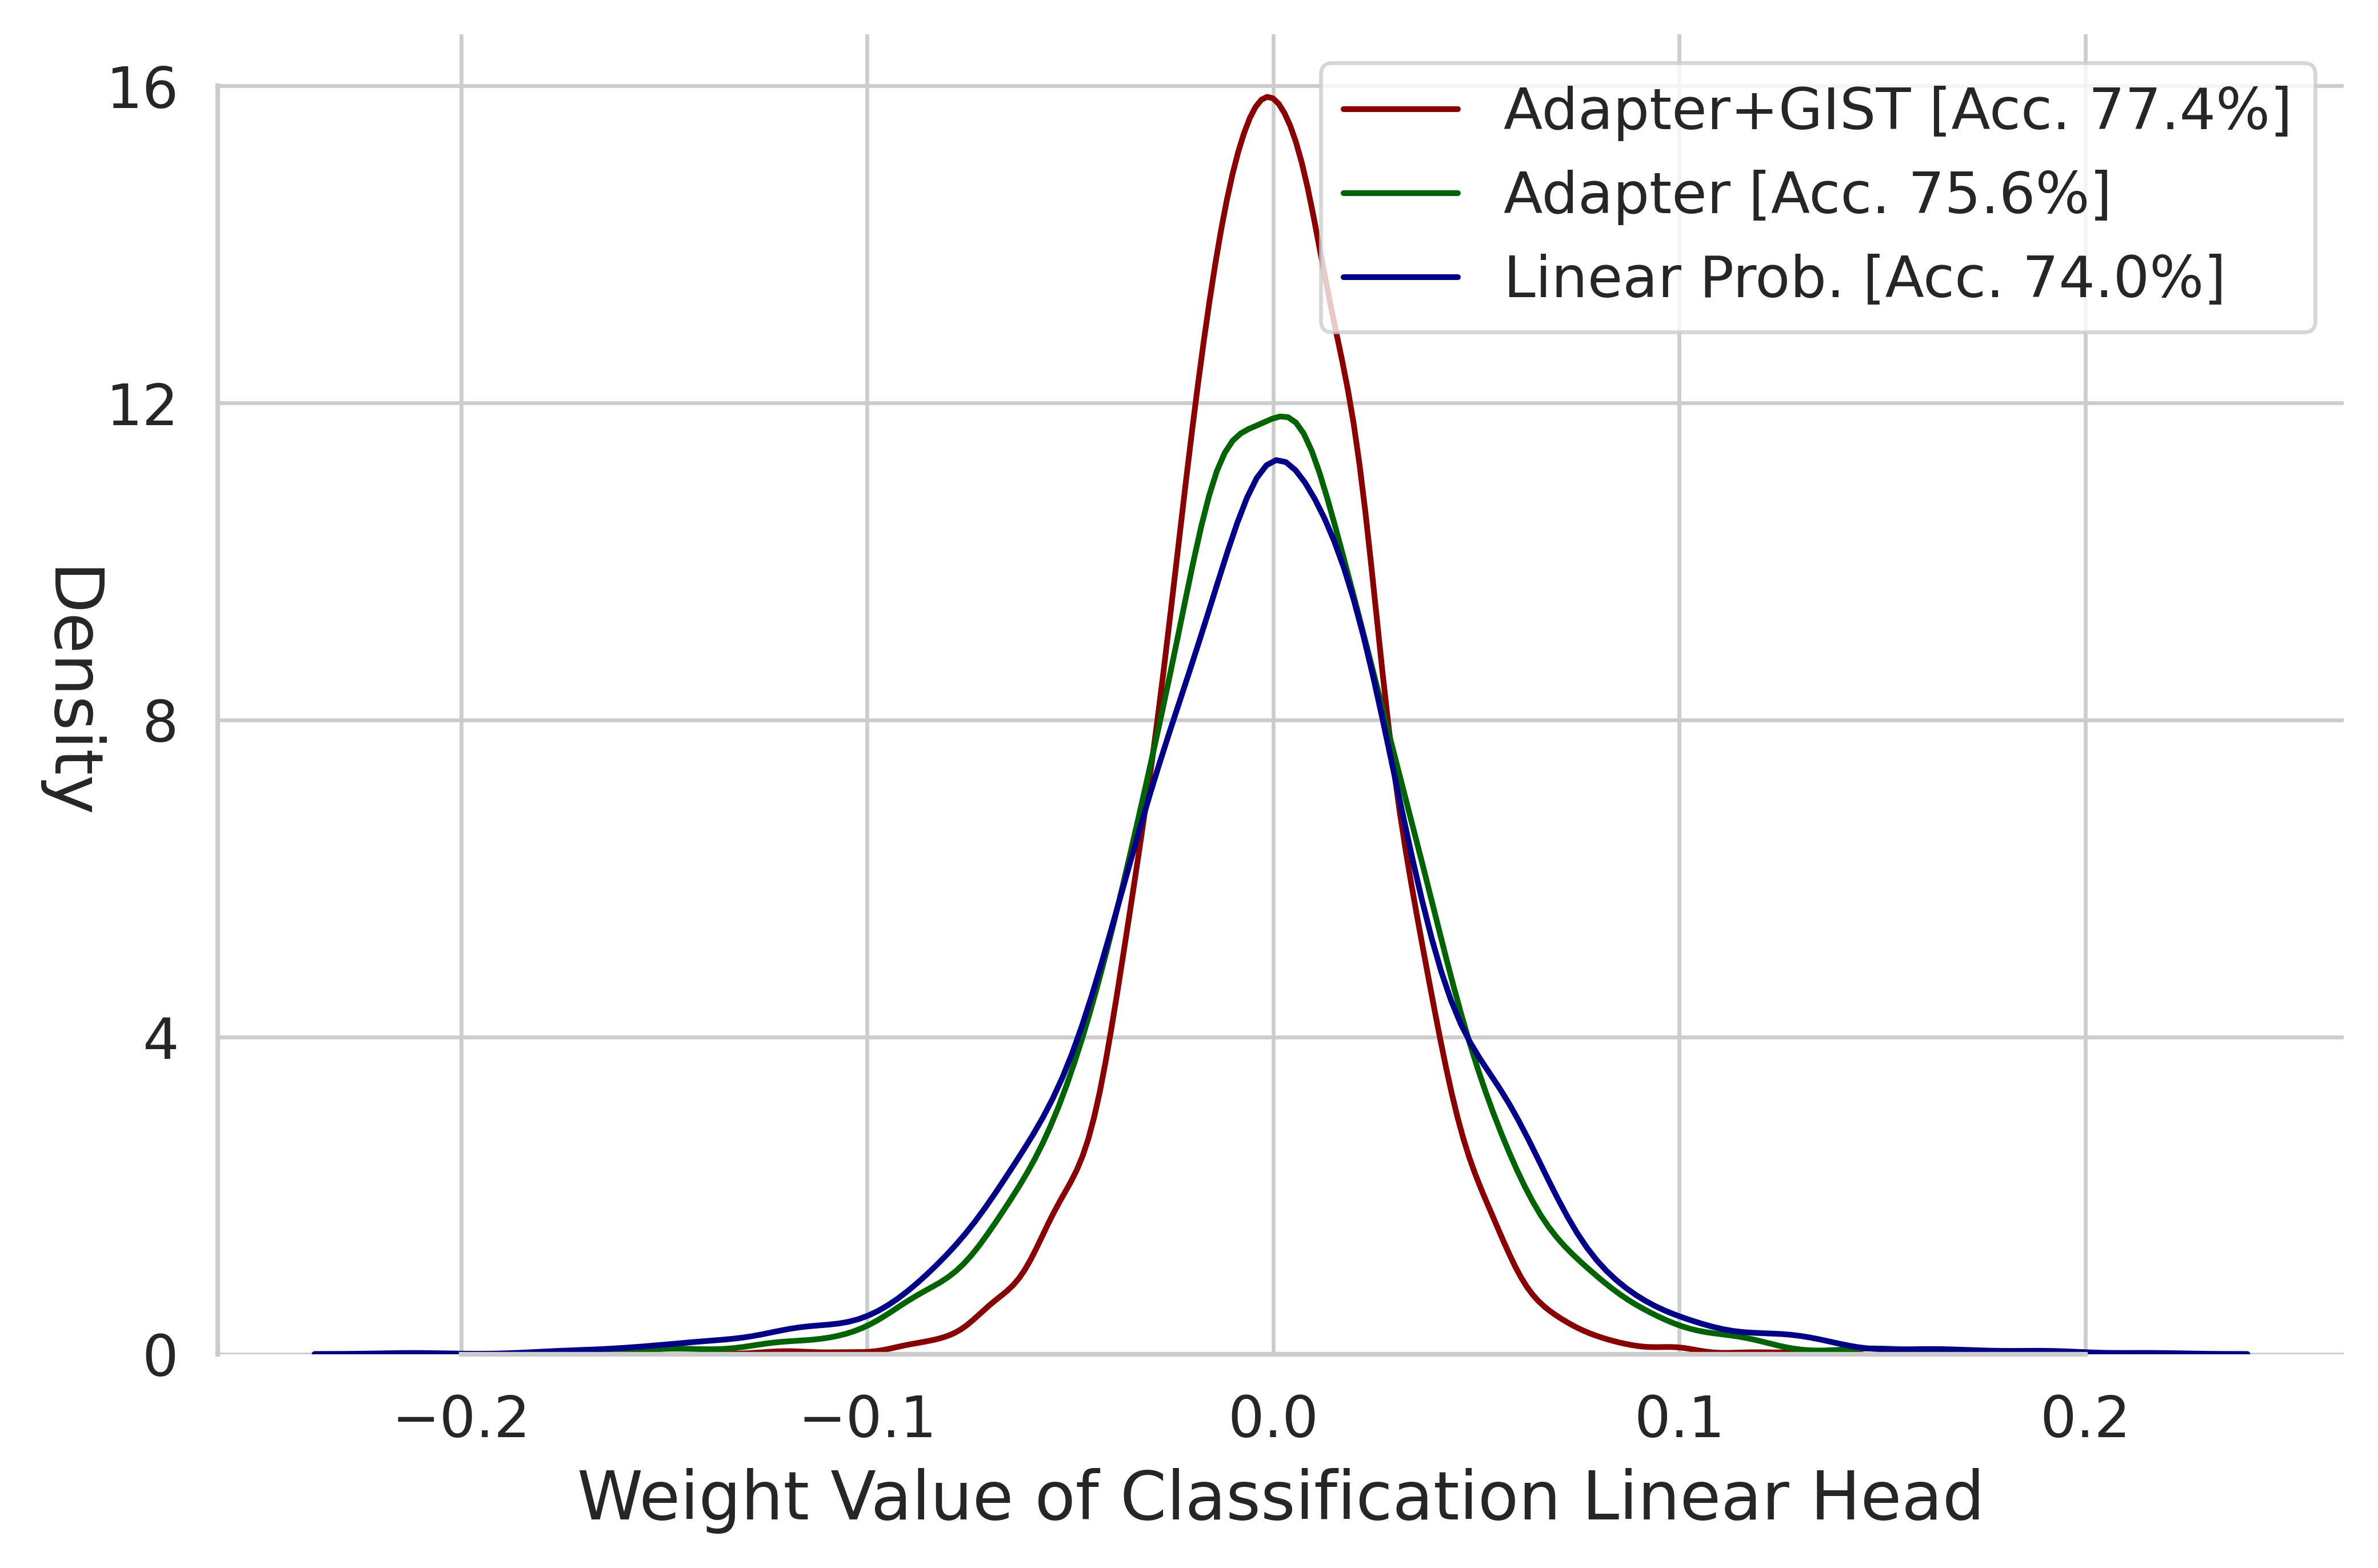

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# 设置风格
sns.set_context("paper")
sns.set_style("whitegrid")

plt.figure(figsize=(8,5), dpi=600)
# sns.kdeplot(weight_gist,bw_adjust=0.75,color="red", label="Distribution 1")
# sns.kdeplot(weight_adapter, bw_adjust=0.75,color="green", label="Distribution 2")
# sns.kdeplot(weight_lp, bw_adjust=0.75,color="blue", label="Distribution 3")
sns.kdeplot(weight_gist, color="darkred", label="Adapter+GIST [Acc. 77.4%]")
sns.kdeplot(weight_adapter, color="darkgreen", label="Adapter [Acc. 75.6%]")
sns.kdeplot(weight_lp, color="darkblue", label="Linear Prob. [Acc. 74.0%]")
# 添加图例
plt.legend(loc='upper right',fontsize=12)

# 添加标题和轴标签
# plt.title('Combined KDE plots')
plt.xlabel('Weight Value of Classification Linear Head', fontsize=14)
plt.ylabel('Density', fontsize=14, rotation=-90,labelpad=15)

# 调整轴的格式
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(4))
plt.tick_params(axis='both', which='major', labelsize=12)

# 设置边界
sns.despine(trim=True)

plt.savefig('./diabetic_retinopathy.png', dpi=600, bbox_inches='tight')
# 显示图形
plt.show()

In [21]:
aaa = ['gist', 'lora']



In [22]:
if ('gistb' or 'gistp') in aaa: print(666)